In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [2]:
!ls

 CXO.jpeg		        MOEX_Threshold.csv   spb_downloader.ipynb
 deltas.ipynb		        plt		    'spb parse.ipynb'
 get.txt		        sbp_code.txt	     SPB_Threshold.csv
 MOEX			        sp500.txt	    'spb коды.txt'
 MOEX_CORONA		        SPB		    'tinkoff downloader.ipynb'
 MOEX_CORONA_T		        SPB20		     volumns.ipynb
 moex_stocks_downloader.ipynb   SPB_codes.csv


In [19]:
#c['o'], c['h'], c['l'], c['c'], c['v']
frame = pd.read_csv('SPB/1min/BA.csv', sep=';', header=None)
# frame.drop("<TIME>", axis=1, inplace=True)
# frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL')
# frame.DATE = frame.DATE.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%y'))
frame

0       1       2       3       4    5   6
0       2019-09-03T07:00:00  358.49  358.49  357.30  357.92   42 NaN
1       2019-09-03T07:01:00  357.35  358.02  357.35  358.02    5 NaN
2       2019-09-03T07:03:00  357.50  357.50  357.50  357.50    1 NaN
3       2019-09-03T07:04:00  358.02  358.81  358.02  358.80    4 NaN
4       2019-09-03T07:05:00  358.80  358.81  358.80  358.81    5 NaN
...                     ...     ...     ...     ...     ...  ...  ..
105990  2020-04-23T22:40:00  136.42  136.44  136.04  136.04  548 NaN
105991  2020-04-23T22:41:00  136.15  136.20  136.02  136.02   57 NaN
105992  2020-04-23T22:42:00  136.00  136.00  136.00  136.00   50 NaN
105993  2020-04-23T22:43:00  136.10  136.39  136.01  136.01   11 NaN
105994  2020-04-23T22:44:00  136.39  136.39  136.39  136.39    1 NaN

[105995 rows x 7 columns]

In [3]:
start_day = datetime.datetime.strptime('01/01/18','%d/%m/%y')
frame = frame[frame.DATE> start_day]

In [4]:
frame.describe()

OPEN           HIGH            LOW          CLOSE  \
count  146914.000000  146914.000000  146914.000000  146914.000000   
mean      314.549207     314.690804     314.399459     314.544035   
std        78.902153      78.832018      78.977221      78.904739   
min        89.000000      90.000000      89.000000      89.000000   
25%       320.500000     320.632500     320.360000     320.500000   
50%       343.760000     343.870000     343.660000     343.770000   
75%       362.950000     363.030000     362.840000     362.950000   
max       390.500000     391.000000     390.000000     390.370000   

                 VOL  
count  146914.000000  
mean     1493.961066  
std      3479.843138  
min         1.000000  
25%        46.000000  
50%       501.000000  
75%      1426.000000  
max    162401.000000

[1.3166e+04 4.7370e+03 8.2540e+03 5.7780e+03 6.4570e+03 7.7900e+03
 1.1669e+04 2.1758e+04 2.8427e+04 2.1065e+04 1.0979e+04 5.0740e+03
 1.5270e+03 2.1500e+02 1.8000e+01]


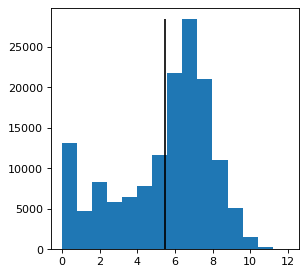

In [8]:
plt.figure(figsize=(4,4),dpi = 80)
log = np.log(frame.VOL)
mean = log.mean() 
b = plt.hist(np.log(frame.VOL),15)[0];
print(b)
plt.vlines(mean,b.min(), b.max())

In [9]:
N = len(frame)
frame['delta'] =  np.concatenate((np.array([0]),abs(np.diff(frame.CLOSE,1))))
frame['M'] = frame['delta']*frame.VOL
frame['L'] = np.zeros(N)
m = np.log(frame.VOL).mean()
frame['sigma_v'] = np.zeros(N)
frame['sigma_v'] = frame['VOL'].apply(lambda x: abs(np.log(x) - m))
# N = 100
step = 5
for i in range(step,N-step):
    a = np.sum(frame['M'][i-step:i])
    frame['L'][i] = a

/home/tesla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [10]:
step = 5
frame['M_sigma'] = frame['delta']*frame.sigma_v
frame['L_sigma'] = np.zeros(N)
for i in range(step,N-step):
    a = np.sum(frame['M_sigma'][i-step:i])
    frame['L_sigma'][i] = a

/home/tesla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [129]:
mean_signal = frame.L_sigma.mean()
median_signal= frame.L_sigma.median()

def plot_stock_volum_signal(stock, signal, volum):
    N = len(stock)
    coef = stock.min()/volum.max()
    start_index = stock.index[0]
    ind_sig = np.argmax(signal)
    fig,axes = plt.subplots(3,1, dpi = 150, figsize=(12,8))
    axes[0].plot(stock)
    axes[1].get_xaxis().set_ticks([])
    axes[2].get_xaxis().set_ticks([])
    axes[1].bar(range(N)+start_index, coef*volum,width=1)
    axes[2].plot(signal)
    axes[2].plot(range(N)+start_index, np.zeros(N)+mean_signal)
    axes[2].plot(range(N)+start_index, np.zeros(N)+median_signal,'g')

#     for ax in axes:
#         ax.hlines(ind_sig+start_index,0,100)


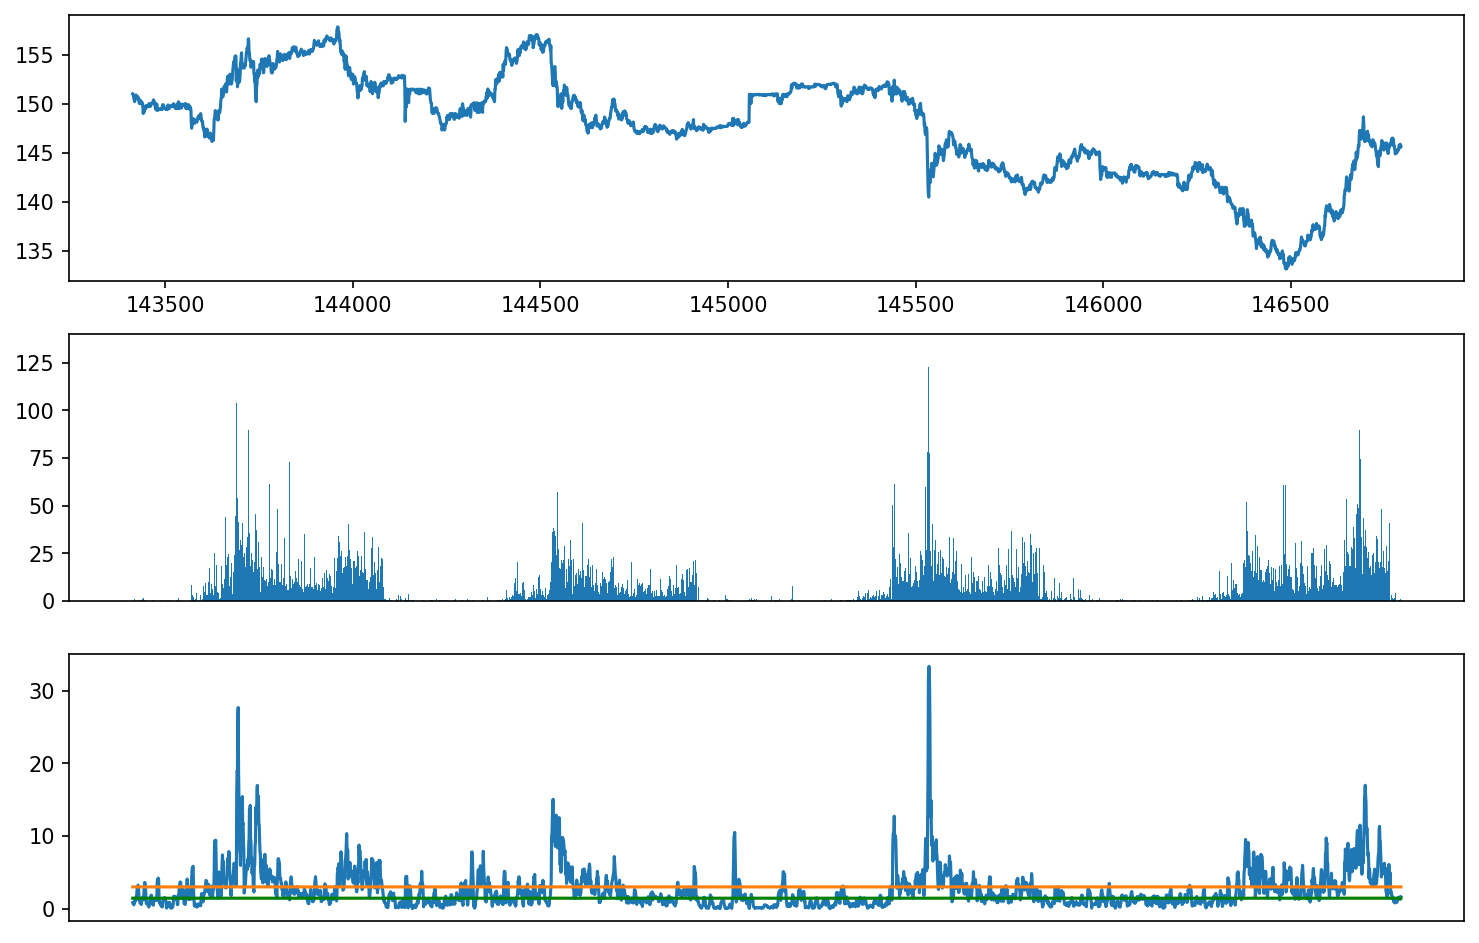

In [140]:
N = 3500
L = 120
plot_stock_volum_signal(frame.CLOSE[-N:-L], frame.L_sigma[-N:-L], frame.VOL[-N:-L])

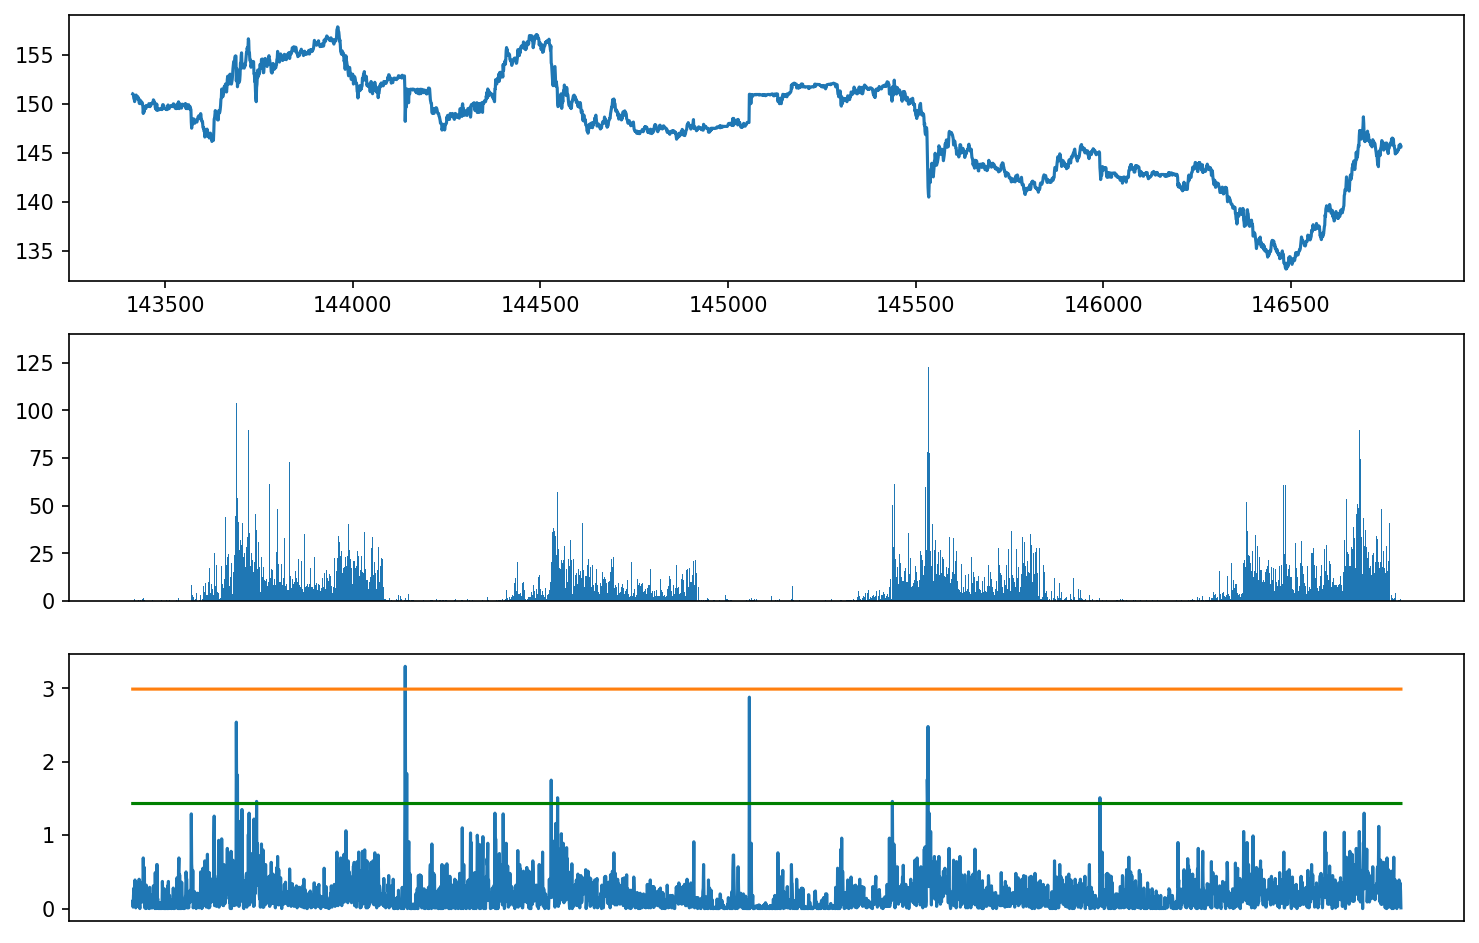

In [142]:
N = 3500
L = 120
plot_stock_volum_signal(frame.CLOSE[-N:-L], frame.delta[-N:-L], frame.VOL[-N:-L])

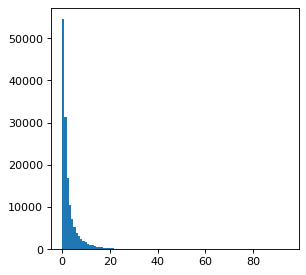

In [138]:
plt.figure(figsize=(4,4),dpi = 80)

b = plt.hist(frame.L_sigma,100)[0];
# print(b)
# plt.vlines(mean,b.min(), b.max())

/home/tesla/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:853: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


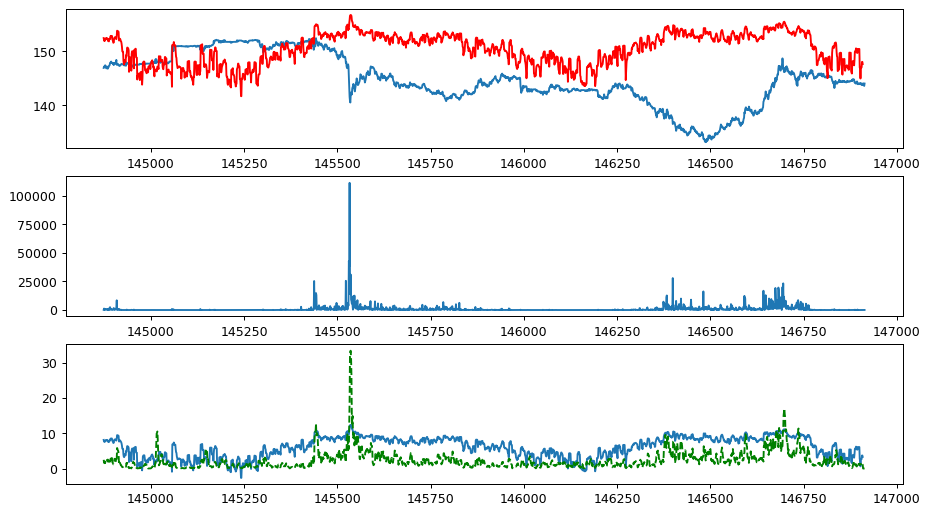

In [88]:
N = 1020*2
fig,ax = plt.subplots(3,1,dpi = 90, figsize=(12,7))
ax[0].plot(frame.CLOSE[-N:])

ax[1].plot(frame.M[-N:])
# ax[2].plot(frame.L[-N:])
ax[2].plot(np.log(frame.L[-N:]))
ax[2].plot(frame.L_sigma[-N:],'g--')

ax[0].plot(np.log(frame.L[-N:]) + np.median(frame.CLOSE[-N:]),'r')


In [128]:
def plot_stock_signal(price, signal, step):
    L = len(price)
    C = int(L/step)
    for i in range(C):
        fig, ax = plt.subplots(2,1, dpi = 150, figsize=(12,4))
        sl = slice(i*step,(i+1)*step,1)        
        ax[0].plot(price[sl],'black')
        ax[0].set_ylim(price[sl].min(),price[sl].max())
        ax[1].plot(signal[sl])
        ax[1].set_ylim(0,10)
        plt.savefig('./plt/s'+str(i)+'.jpeg')

In [129]:
plot_stock_signal(frame[-20000:].CLOSE.values,frame[-20000:].L_sigma.values,500)

AttributeError: 'DataFrame' object has no attribute 'L_sigma'

In [130]:
#c['o'], c['h'], c['l'], c['c'], c['v']
frame = pd.read_csv('SPB/1min/MNST.csv', sep=';', header=None)
# frame.drop("<TIME>", axis=1, inplace=True)
frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL','d')
# frame.DATE = frame.DATE.apply(lambda x: datetime.datetime.strptime(x,'%d/%m/%y'))
frame = frame.drop('d',axis=1,)

transform_date = lambda s: datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%S')
frame.DATE = frame.DATE.apply(transform_date)
frame['day'] = frame.DATE.apply(lambda x: x.day)

In [131]:
def plot_hist_with_thresh(arr):
    fig = plt.figure(figsize=(5,5), dpi =100)
    arr_log = np.log(arr)
    median = arr_log.median()
    mean = arr_log.mean()
    q =  np.log(np.quantile(vol,0.995))
    s = q - median 
    bids = plt.hist(arr_log,25)[0]
    plt.vlines(median,0,bids.max(),'r');
    plt.vlines(mean,0,bids.max(),'y');
    plt.vlines(median+0.5*s,0,bids.max(),'green');
#     print(bids);
    return median

In [132]:
frame['log_v'] = np.log(frame.VOL)

159


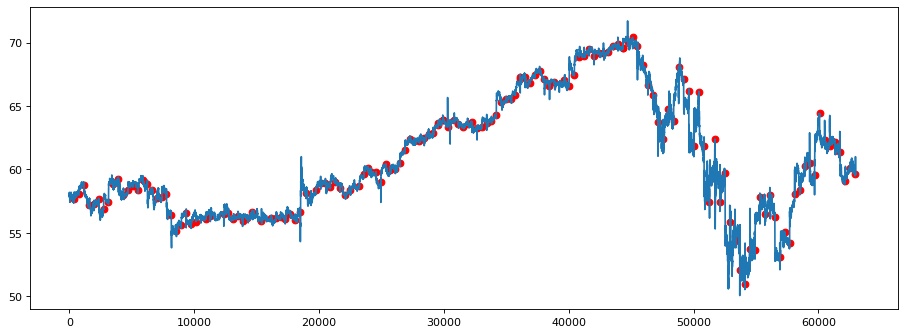

In [133]:
fig = plt.figure(figsize=(14,5), dpi =80)

N = 66000
c = 1.6
index = np.where(frame.log_v[-N:]> (c*median))
print(len(index[0]))
arr = frame.OPEN[-N:].values
plt.plot(arr)
plt.scatter(index[0], arr[index],c='r')

### SPB 

In [158]:
#c['o'], c['h'], c['l'], c['c'], c['v']
frame = pd.read_csv('SPB/1min/MOMO.csv', sep=';', header=None)
frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL','d')
frame = frame.drop('d',axis=1,)
transform_date = lambda s: datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%S')
frame.DATE = frame.DATE.apply(transform_date)
frame['day'] = frame.DATE.apply(lambda x: x.day)
frame['year'] = frame.DATE.apply(lambda x: x.year)
frame['month'] = frame.DATE.apply(lambda x: x.month)
frame = frame[(frame.year == 2020) & (frame.month >=2)]


7.518064181233078

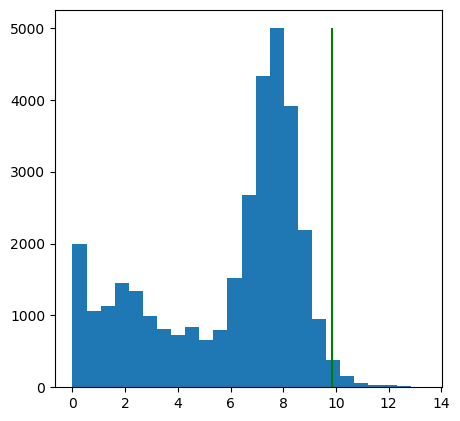

In [166]:
def get_thresh_sbp(arr):
    arr_log = np.log(arr)
    median = arr_log.median()
    q =  np.log(np.quantile(arr,0.995))
    s = q - median 
    return median + s*0.8

def plot_hist_with_thresh(arr):
    fig = plt.figure(figsize=(5,5), dpi =100)
    arr_log = np.log(arr)
    bids = plt.hist(arr_log,25)[0]
    thr = get_thresh_sbp(arr)
    plt.vlines(thr,0,bids.max(),'green');
#     print(bids);
    return median
plot_hist_with_thresh(frame.VOL)

In [170]:
def create_thresh(filedir):
    names = os.listdir(filedir)
    d = {}
    need = ["DAL" ,"BA" ,"OII" ,"PLZL","RDS.A","NEM" ,"OIS" ,"GILD","SNY" ,"SPR" ,"APY" ,"TSM" ,"AMD" ,"CCL" ,"MNK" ,"SPG" ,"PFE" ,"PLAY","WFC" ,"PCG" ,"WELL","GTX" ,"KR" ,"XOM" ,"INTC","MRNA","MSFT","MOMO","V" ,"MU" ,"PBI" ,"OVV" ,"EVH" ,"RIG" ,"ET" ,"ZYNE","ATRA","TSLA","PBF" ,"PEP" ,"TGNA","APA" ,"FCX" ,"ULTA"]
    for name in names:
        ticker = name.split('.')[0]
        if ticker not in need:
            continue
        frame = pd.read_csv(filedir+name, header=None, sep=';')
        frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL','d')
        frame = frame.drop('d',axis=1,)
        transform_date = lambda s: datetime.datetime.strptime(s,'%Y-%m-%dT%H:%M:%S')
        frame.DATE = frame.DATE.apply(transform_date)
        frame['day'] = frame.DATE.apply(lambda x: x.day)
        frame['year'] = frame.DATE.apply(lambda x: x.year)
        frame['month'] = frame.DATE.apply(lambda x: x.month)
        frame = frame[(frame.year == 2020) & (frame.month >=2)]
        thr = get_thresh_sbp(frame.VOL)
#         print(thr)
        
        d[ticker] = thr
        print(ticker)
    file = open('SPB_Threshold.csv','w')
    file.write('Ticker;Threshold;Threshold_One;\n')
    for key, val in d.items():
        file.write('{};{};{};\n'.format(key, val, val))
    file.close()
    return d

In [171]:
d = create_thresh('SPB/1min/')

INTC
CCL
KR
FCX
SNY
MOMO
GTX
PCG
MSFT
SPG
SPR
TSLA
MNK
RIG
PBI
OII
WFC
AMD
ET
V
GILD
MU
PFE
PEP
OIS
XOM
ATRA
TGNA
DAL
WELL
NEM
APY
PLAY
APA
MRNA
EVH
TSM
BA
PBF
ULTA


### Moex уровень

In [72]:
frame = pd.read_csv('MOEX/1min/HYDR.csv',header=None, sep=';')
# frame = frame.drop('6',axis=1)
frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL','N')
frame = frame.drop('N',axis=1)
frame.DATE = frame.DATE.apply(transform_date)
def get_thresh(arr):
    arr_log = np.log(arr)
    median = arr_log.median()
    q =  np.log(np.quantile(arr,0.995))
    s = q - median 
    return median + s*0.5

In [119]:
def create_thresh(filedir):
    names = os.listdir(filedir)
    d = {}
    for name in names:
        frame = pd.read_csv(filedir+name, header=None, sep=';')
        frame.columns = ('DATE','OPEN','HIGH','LOW','CLOSE','VOL','N')
        frame = frame.drop('N',axis=1)
        frame.DATE = frame.DATE.apply(transform_date)
        thr = get_thresh(frame.VOL)
#         print(thr)
        ticker = name.split('.')[0]
        d[ticker] = thr
    return d

In [120]:
thr = create_thresh('MOEX/1min/')

In [122]:
file = open('MOEX_Threshold.csv','w')
file.write('Ticker;Threshold;Threshold_One;\n')
for key, val in thr.items():
    file.write('{};{};{};\n'.format(key, val, val))
file.close()

In [5]:
import numpy as np
a = np.array([])
angles = {'a':4,
          'b':-5,
          'c':10,
          'e':-1}

In [11]:
pos_angles = sorted(angles.items(), key = lambda kv: kv[1], reverse=True)[:55]


In [12]:
pos_angles

[('c', 10), ('a', 4), ('e', -1), ('b', -5)]